0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


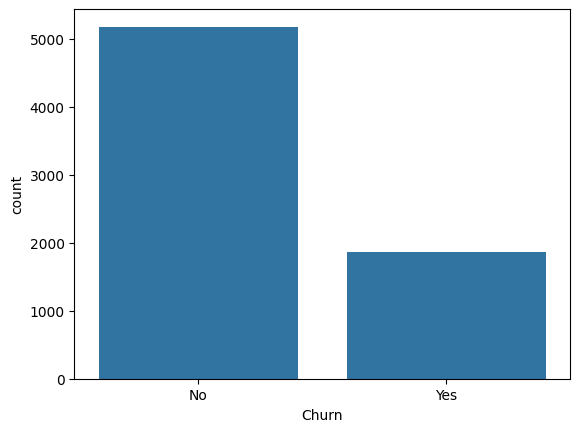

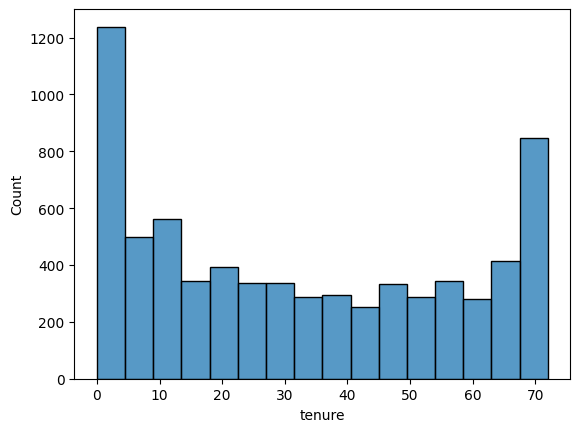

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/Users/ekaterinasharifullina/Documents/my_env/programming/churn/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# do we need that line ?? a = pd.DataFrame(df)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'])

#df.dropna(axis=['customerID'], how=all)

sns.countplot(x = "Churn", data=df)
plt.show()

sns.histplot(df['tenure'])
plt.show()


